# Data set Adult Dataset from
http://archive.ics.uci.edu/ml/machine-learning-databases/adult/

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("adult_data.csv")
df = df.replace(' ?',np.NaN)
df = df.replace(' <=50K',0)
df = df.replace(' >50K',1)
df = df.dropna()
#df = df.drop(["education","fnlwgt"],axis=1)

In [36]:
df.isnull().values.any() ## Any null values

False

In [37]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,Race,Sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [38]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,Race,Sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## Data Exploration

## Summary Statistics

In [39]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


###### Age, fnlwgt, EducationNum and HoursPerWeek look pretty ok. But CapitalGain and CapitalLoss both have an IQR of 0. Could they be power law distributions? Let's find out.

In [40]:
df.capital_gain.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
3325        53
2174        48
10520       43
4064        42
4650        41
14084       41
20051       37
3137        37
27828       34
594         34
3908        32
2829        31
13550       27
6849        27
14344       26
1055        25
2885        24
3411        24
4787        23
2176        23
         ...  
9562         4
1086         4
25124        4
1424         3
2961         3
7896         3
4687         3
2936         3
1173         3
5721         3
2009         3
6360         3
41310        2
6723         2
3456         2
2993         2
401          2
11678        2
2062         2
18481        2
7978         1
1639         1
2538         1
2387         1
5060         1
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital_gain, Length: 119, dtype: int64

#####  91.7% of the CapitalGain consists of 0. Now onto the CapitalLoss column:

In [41]:
### How about capital_loss

In [42]:
df.capital_loss.value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
1485       51
2415       49
1602       47
1740       42
1590       40
1876       39
1672       34
1564       25
2258       25
1669       24
1741       24
2001       24
1980       23
1719       22
2002       21
2051       21
1408       21
1579       20
2377       20
1721       18
1504       18
1974       18
2339       17
2179       15
1628       15
        ...  
323         3
4356        3
2267        3
3683        2
1755        2
2352        2
1648        2
1138        2
810         2
1735        2
2238        2
2754        2
3004        2
3900        2
974         2
2149        2
1816        2
3770        2
2080        1
2489        1
2282        1
2163        1
155         1
2467        1
1844        1
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital_loss, Length: 92, dtype: int64

#### This is even worse. 95.3% of the CapitalLoss column consists of 0. We can drop these coumns as we do not see any correlations
  

In [43]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital-status', 'occupation', 'relationship', 'Race', 'Sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [44]:
df.drop("capital_gain", axis=1, inplace=True,)
df.drop("capital_loss", axis=1, inplace=True,)

In [45]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital-status', 'occupation', 'relationship', 'Race', 'Sex',
       'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [46]:
#df.groupby("Age").CapitalLoss.hist(normed=1, alpha=0.6,)

### Visualization 

## Create Data sets

In [47]:
Y = df["income"]
cat_X = [i for i in df.columns if i!="income"]
X = df[cat_X]

In [54]:
X

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,Race,Sex,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States


## Visualizations
## This needs a correction - Use a histogram

In [48]:

#print(X.columns)
#table = pd.crosstab(X["age"],Y).plot(kind='line', stacked=True)
#plt.title('Stacked Bar Chart of Age vs Income')
#plt.xlabel('Age')
#plt.ylabel('Income(0<=50K,1>50K)')


In [49]:
#df["income"] = df["income"].map({ "<=50K": 0, ">50K": 1 })

In [50]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

Text(0,0.5,'Income(0<=50K,1>50K)')

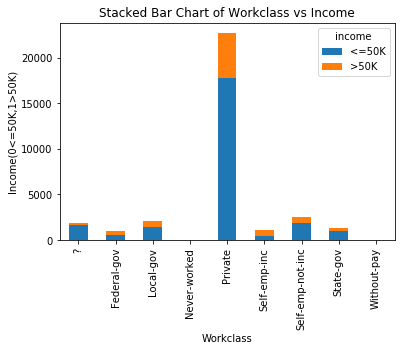

In [51]:

table1 = pd.crosstab(X["workclass"],Y).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Workclass vs Income')
plt.xlabel('Workclass')
plt.ylabel('Income(0<=50K,1>50K)')

Text(0,0.5,'Income(0<=50K,1>50K)')

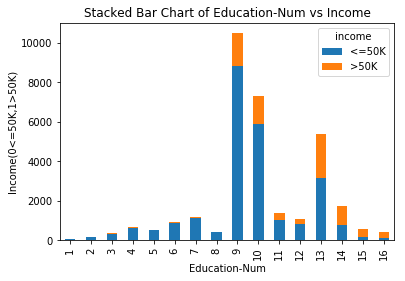

In [52]:
table2 = pd.crosstab(X["education_num"],Y).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education-Num vs Income')
plt.xlabel('Education-Num')
plt.ylabel('Income(0<=50K,1>50K)')


In [55]:
#X['marital_status'].unique()

In [ ]:
table3 = pd.crosstab(X["marital-status"],Y)
table3.div(table3.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Income')
plt.xlabel('Marital Status')
plt.ylabel('Income(0<=50K,1>50K)')

In [ ]:
table4 = pd.crosstab(X["occupation"],Y).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Occupation vs Income')
plt.xlabel('Occupation')
plt.ylabel('Income(0<=50K,1>50K)')

In [ ]:
table5 = pd.crosstab(X["relationship"],Y).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Occupation vs Income')
plt.xlabel('Occupation')
plt.ylabel('Income(0<=50K,1>50K)')

In [ ]:
table8 = pd.crosstab(X["capital_loss"],Y).plot(kind='line', stacked=True)
plt.title('Stacked Bar Chart of capital-loss vs Income')
plt.xlabel('capital-loss')
plt.ylabel('Income(0<=50K,1>50K)')

In [ ]:

print(df.groupby("capital_loss").count())
print("Data is biased with more data of capital-loss 0 than any other")


In [ ]:
table5 = pd.crosstab(X["Race"],Y).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Race vs Income')
plt.xlabel('Race')
plt.ylabel('Income(0<=50K,1>50K)')

In [ ]:


print(df.groupby("Race").count())
print("Data is biased with more data of white men than any other")


In [1]:
table6 = pd.crosstab(X["Sex"],Y).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Sex vs Income')
plt.xlabel('Sex')
plt.ylabel('Income(0<=50K,1>50K)')

NameError: name 'pd' is not defined

In [ ]:

print(df.groupby("Sex").count())
print("Data is biased with more data of males than any other")

In [ ]:
table7 = pd.crosstab(X["capital_gain"],Y).plot(kind='line', stacked=True,color='red')
plt.title('Stacked Bar Chart of capital-gain vs Income')
plt.xlabel('capital-gain')
plt.ylabel('Income(0<=50K,1>50K)')

In [ ]:

print(df.groupby("capital_gain").count())
print("Data is biased with more data of capital-gain 0 than any other")


In [ ]:

table9 = pd.crosstab(X["hours_per_week"],Y).plot(kind='line', stacked=True)
plt.title('Stacked Bar Chart of hours per week vs Income')
plt.xlabel('hours per week')
plt.ylabel('Income(0<=50K,1>50K)')

In [ ]:
table10 = pd.crosstab(X["native_country"],Y).plot(kind='line', stacked=True)
plt.title('Stacked Bar Chart of native Country vs Income')
plt.xlabel('Country')
plt.ylabel('Income(0<=50K,1>50K)')


In [ ]:
print(df.groupby("native_country").count())

In [ ]:
X.head()

## Decide the features we need to keep

In [ ]:
##X = X.drop(["Race","Sex","capital_gain","capital_loss","native_country"],axis=1)
X = X.drop(["capital_gain","capital_loss","native_country"],axis=1)    ### Iteration we can combine all nonnUS countries together

In [ ]:
X.head()

### Create Dummy Variables

In [ ]:
#cat_vars = ['age','workclass','marital-status','occupation','relationship']
cat_vars = ['Race','Sex','workclass','marital-status','occupation','relationship']
for i in cat_vars:
    print('I is ',i)
    cat_list = 'var'+'_'+i
    cat_list = pd.get_dummies(X[i],prefix=i)
    x1= X.join(cat_list)
    X=x1
     


In [ ]:
X.head()

In [ ]:
to_keep = [i for i in X.columns if i not in cat_vars]
print(to_keep)
X_Final = X[to_keep]

In [ ]:
X_Final.head() 

In [ ]:
X_Final.head()

In [ ]:
#Packages for RFE and LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logistic = LogisticRegression()
rfe = RFE(logistic,20)
rfe.fit(X_Final,Y)
print(rfe.support_)
print(rfe.ranking_)
selected_columns =[]
for i in range(len(rfe.support_)):
    if(rfe.support_[i] == True):
        selected_columns.append(to_keep[i])
 
X_Report = X_Final[selected_columns]  

In [ ]:
#from scipy import stats
#stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq,df)
#import statsmodels.api as sm
#logit_model=sm.Logit(Y,X_Report)
#result=logit_model.fit()
#print(result.summary())

### FIT THE MOPDEL USING LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Report, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
    
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))


## Measure the Accuracy Metrics

In [ ]:


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Report, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
    
y_pred = logreg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
TN, FP    = confusion_matrix[0, 0], confusion_matrix[0, 1]
FN, TP    = confusion_matrix[1, 0], confusion_matrix[1, 1]


In [ ]:
Accuracy = (float(TP+TN)/float(TP+FP+TN+TP))
print('Accuracy:        ',  round(Accuracy,2) ,"\n")


In [ ]:
Precision = (float(TP)/float(TP+FP))
print('Precision:        ',  round(Precision,2) ,"\n")

In [ ]:
Recall = (float(TP)/float(TP+FN))
print ('Recall:        ',round(Recall,2))

In [ ]:
Specificity = (float(TN)/float(TN+FP))
print ('Sepcificity:        ',  round(Specificity,2))

In [ ]:
#F1 Score = 2 * Precision * Recall / (Precision + Recall) 
F1Score = (2*Precision*Recall)/(Precision+Recall)


In [ ]:
print ('F1 Score        ',  round(F1Score,2) )

### Iterate till we get better scores for accuracy